# Higher Education Consulting Analysis

## Library Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
import warnings

warnings.filterwarnings('ignore')

## Data Import and Overview

In [2]:
df = pd.read_csv('data/universities.csv')
# imports the csv file as a dataframe

In [3]:
df.head()
# outputs the first 5 rows of data

,College Name,State,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [4]:
df.info()
# outputs information about different columns, like the type, the non-null count, etc.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1302 entries, 0 to 1301
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   College Name              1302 non-null   object 
 1   State                     1302 non-null   object 
 2   Public (1)/ Private (2)   1302 non-null   int64  
 3   # appli. rec'd            1292 non-null   float64
 4   # appl. accepted          1291 non-null   float64
 5   # new stud. enrolled      1297 non-null   float64
 6   % new stud. from top 10%  1067 non-null   float64
 7   % new stud. from top 25%  1100 non-null   float64
 8   # FT undergrad            1299 non-null   float64
 9   # PT undergrad            1270 non-null   float64
 10  in-state tuition          1272 non-null   float64
 11  out-of-state tuition      1282 non-null   float64
 12  room                      981 non-null    float64
 13  board                     804 non-null    float64
 14  add. fee

In [5]:
df.describe()
# outputs summary statistics (mean, median, 25 and 75 quantiles, etc.) about the numerical columns 

,Public (1)/ Private (2),# appli. rec'd,# appl. accepted,# new stud. enrolled,% new stud. from top 10%,% new stud. from top 25%,# FT undergrad,# PT undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,stud./fac. ratio,Graduation rate
count,1302.000000,1292.000000,1291.000000,1297.000000,1067.000000,1100.000000,1299.000000,1270.000000,1272.000000,1282.000000,981.000000,804.000000,1028.000000,1254.000000,1121.000000,1270.000000,1300.000000,1204.000000
mean,1.639017,2752.097523,1870.683191,778.880493,25.671978,52.350000,3692.665127,1081.526772,7897.274371,9276.905616,2514.681957,2060.983831,392.012646,549.972887,1389.291704,68.645669,14.858769,60.405316
std,0.480470,3541.974712,2250.866400,884.578274,18.312618,20.881316,4544.847897,1672.202912,5348.162626,4170.770851,1150.836848,661.742099,469.379234,167.355386,714.247857,17.825627,5.186399,18.889058
min,1.000000,35.000000,35.000000,18.000000,1.000000,6.000000,59.000000,1.000000,480.000000,1044.000000,500.000000,531.000000,9.000000,90.000000,75.000000,8.000000,2.300000,8.000000
25%,1.000000,695.750000,554.500000,236.000000,13.000000,36.750000,966.000000,131.250000,2580.000000,6111.000000,1710.000000,1619.250000,130.000000,480.000000,900.000000,57.000000,11.800000,47.000000
50%,2.000000,1470.000000,1095.000000,447.000000,21.000000,50.000000,1812.000000,472.000000,8050.000000,8670.000000,2200.000000,1980.000000,264.500000,502.000000,1250.000000,71.000000,14.300000,60.000000
75%,2.000000,3314.250000,2303.000000,984.000000,32.000000,66.000000,4539.500000,1313.000000,11600.000000,11659.000000,3040.000000,2401.500000,480.000000,600.000000,1794.000000,82.000000,17.600000,74.000000
max,2.000000,48094.000000,26330.000000,7425.000000,98.000000,100.000000,31643.000000,21836.000000,25750.000000,25750.000000,7400.000000,6250.000000,4374.000000,2340.000000,6900.000000,105.000000,91.800000,118.000000


In [6]:
df.describe(include='O')
# outputs summary statistics (count, unique, top, etc.) of non-numerical columns. 

,College Name,State
count,1302,1302
unique,1274,51
top,Concordia College,NY
freq,4,101


In [7]:
df.isna().sum()
# number of null values in each column 

College Name                  0
State                         0
Public (1)/ Private (2)       0
# appli. rec'd               10
# appl. accepted             11
# new stud. enrolled          5
% new stud. from top 10%    235
% new stud. from top 25%    202
# FT undergrad                3
# PT undergrad               32
in-state tuition             30
out-of-state tuition         20
room                        321
board                       498
add. fees                   274
estim. book costs            48
estim. personal $           181
% fac. w/PHD                 32
stud./fac. ratio              2
Graduation rate              98
dtype: int64

<Axes: >

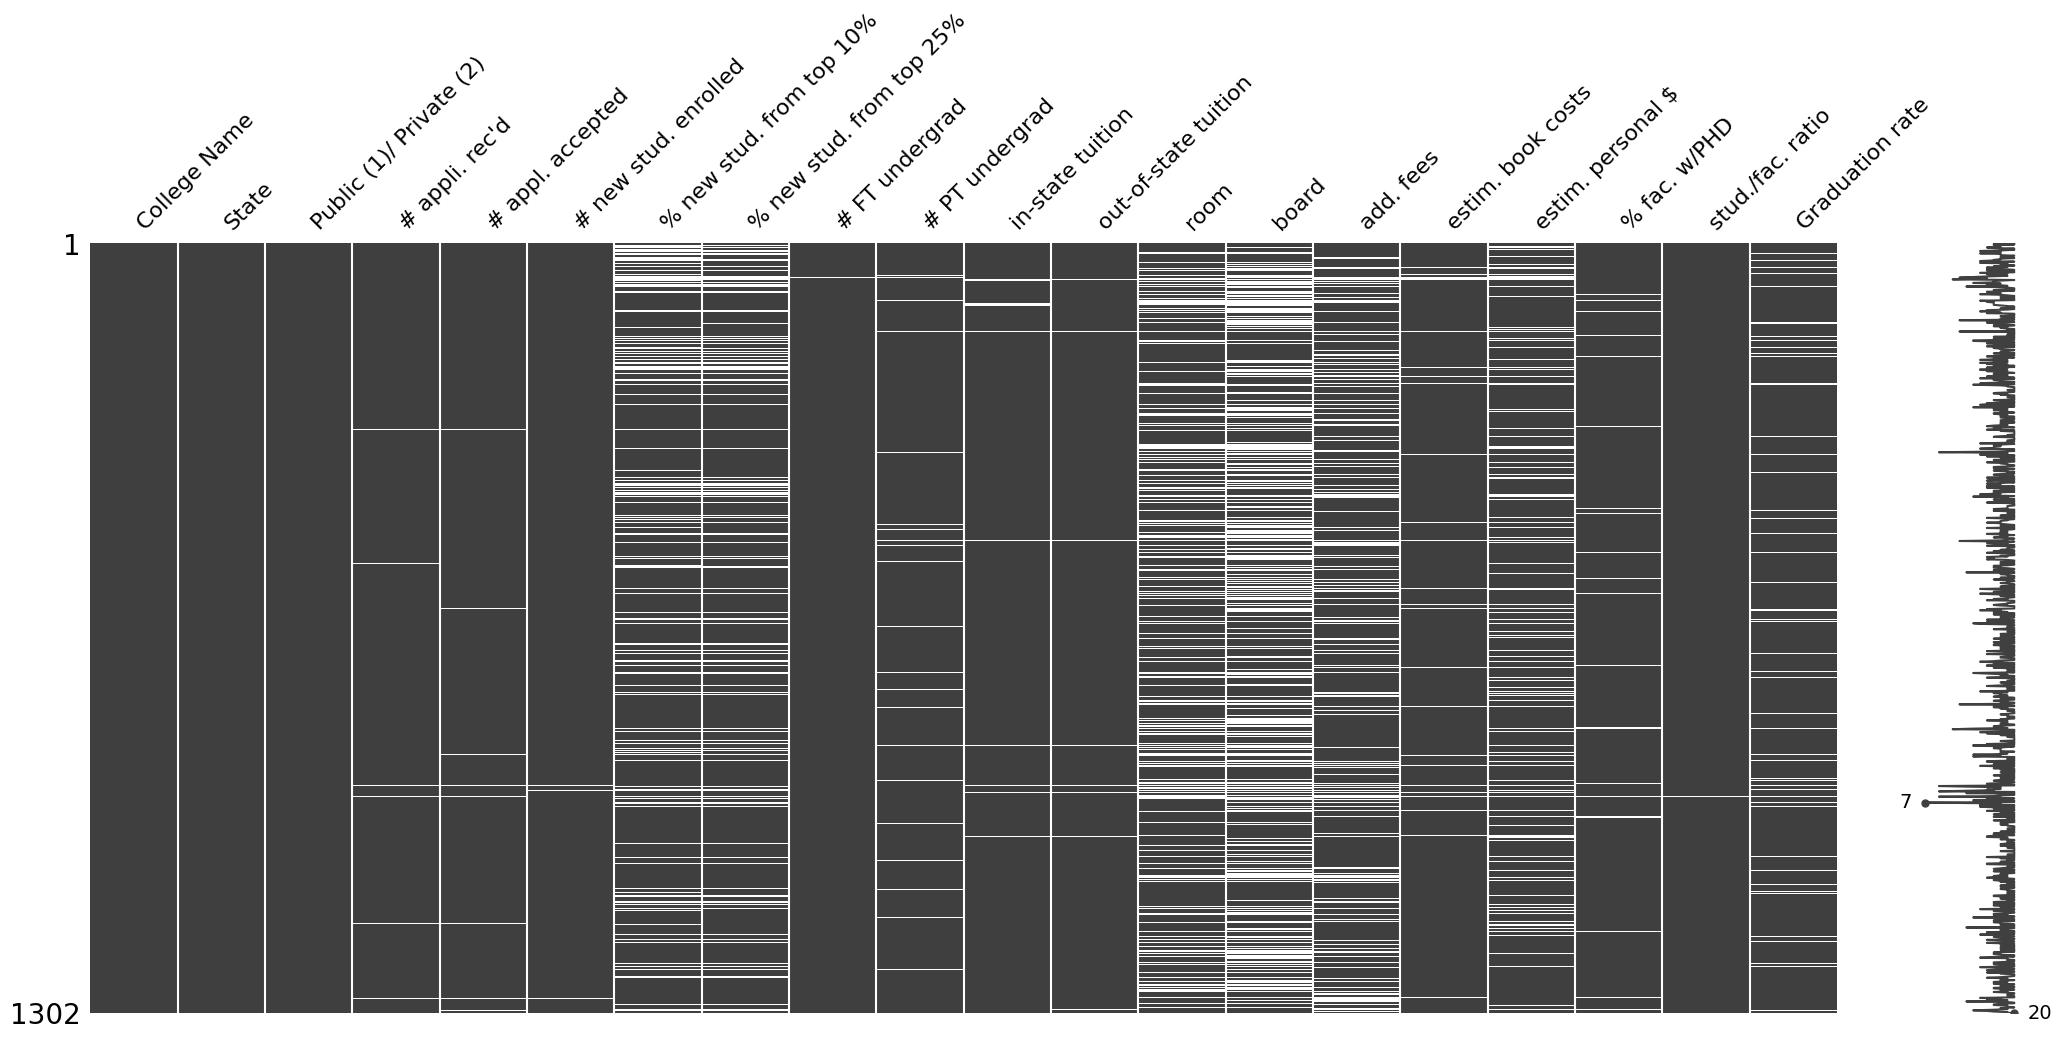

In [8]:
missingno.matrix(df)
# shows the missing values in a visual matrix

> we can see in the above visualization that many columns are missing many values, namely, the % of new students from top 10 and 25%, the room cost, the board cost, the additional fees, and the estimated personal cost. We also see missing values in the graduation rate.
>
> The missing values in thenew students from top 10% and 25% can be filled with 0s, as we will assume that no new students are from the top 10 or 25%, which could be the result of missing values.
>
> For the graduation rate missing values, we will need to drop those rows, as this is going to be our target variable, so we cannot impute the missing values, as this would be synthetic data, which should not be used for a target variable.
>
> For the other missing values, we will visualize them to see how to best fill in the missing values, then determine if the columns are worth keeping. 

In [9]:
df.shape
# shape of the data (rows, columns)

(1302, 20)

## Column Renaming

I will do some column renaming to make usage easier.

In [10]:
df.columns
# outputs the list of columns for reference

Index(['College Name', 'State', 'Public (1)/ Private (2)', '# appli. rec'd',
       '# appl. accepted', '# new stud. enrolled', '% new stud. from top 10%',
       '% new stud. from top 25%', '# FT undergrad', '# PT undergrad',
       'in-state tuition', 'out-of-state tuition', 'room', 'board',
       'add. fees', 'estim. book costs', 'estim. personal $', '% fac. w/PHD',
       'stud./fac. ratio', 'Graduation rate'],
      dtype='object')

In [11]:
df.rename(columns={
    '# appli. rec\'d': 'applications_recieved', 
    '# appl. accepted': 'applications_accepted', 
    '# new stud. enrolled': 'new_student_enrolled', 
    '% new stud. from top 10%': 'new_student_top_10',
    '% new stud. from top 25%': 'new_student_top_25', 
    '# FT undergrad': 'full_time_undergrad', 
    '# PT undergrad': 'part_time_undergrad',
    'stud./fac. ratio': 'student_faculty_ratio'
}, inplace=True)
# changes the specified column names (keys) to the new values (values)

In [12]:
df.head()
# output the first 5 rows of data

,College Name,State,Public (1)/ Private (2),applications_recieved,applications_accepted,new_student_enrolled,new_student_top_10,new_student_top_25,full_time_undergrad,part_time_undergrad,in-state tuition,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,student_faculty_ratio,Graduation rate
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,1742.0,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,1742.0,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,1700.0,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0


In [13]:
df['school_type'] = df['Public (1)/ Private (2)'].map({1: 'Public', 2: 'Private'})
# makes a new column "school_type" which lists either public or private, depending on the "Public (1)/ Private (2)" column

In [14]:
df.head()

,College Name,State,Public (1)/ Private (2),applications_recieved,applications_accepted,new_student_enrolled,new_student_top_10,new_student_top_25,full_time_undergrad,part_time_undergrad,...,out-of-state tuition,room,board,add. fees,estim. book costs,estim. personal $,% fac. w/PHD,student_faculty_ratio,Graduation rate,school_type
0,Alaska Pacific University,AK,2,193.0,146.0,55.0,16.0,44.0,249.0,869.0,...,7560.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,11.9,15.0,Private
1,University of Alaska at Fairbanks,AK,1,1852.0,1427.0,928.0,NaN,NaN,3885.0,4519.0,...,5226.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,10.0,NaN,Public
2,University of Alaska Southeast,AK,1,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,...,5226.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,9.5,39.0,Public
3,University of Alaska at Anchorage,AK,1,2065.0,1598.0,1162.0,NaN,NaN,6209.0,10537.0,...,5226.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,13.7,NaN,Public
4,Alabama Agri. & Mech. Univ.,AL,1,2817.0,1920.0,984.0,NaN,NaN,3958.0,305.0,...,3400.0,1108.0,1442.0,155.0,500.0,850.0,53.0,14.3,40.0,Public


## Outlier Cleaning

> For the most part, outliers will remain in the dataset, as having a high tuition, high acceptance rate, etc. are likely real data. removing outliers should not be done on real data unless it interferes with the analysis or modeling I am trying to perform. In this case, the model should understand outliers mean large schools, which shouldn't affect my modeling nor my analysis, so they will remain. When imputing values however, I will do so without the outliers to get better imputations.
>
> One outlier will be removed, and that is where the gradution rate is 118%. This is clearly an error, and so should be removed. I will also in the same step, remove columns with missing values for graduation rate, as they should be removed. 

In [15]:
df.shape

(1302, 21)

In [16]:
df = df[df['Graduation rate'] <= 100.0]
# filters out the graduation rates over 100, as well as any missing values for that column.

In [17]:
df.shape

(1203, 21)

In [72]:
df['Graduation rate'].isna().sum()
# checks how many missing values are in the column. 

np.int64(0)

## Data Visualizations

In this section, I will visualize some of the main data points to find patterns and trends in the data, as well as determine how the value should be imputed. 

### Helper functions

In [19]:
def plot_hist_box(data, column):
    """
    Creator: Daniel Gallo
    Inputs: 
        Data - The dataframe from which to perform the logic in
        Column: the column in the dataframe to focus on
    Outputs:
        Outputs a figure with a histogram of the specified column on top, and a boxplot of the same data on the bottom. 
        This histogram also shows the median and mean of the data. 
    """
    fig, axes = plt.subplots(2, 1, figsize=(7,7))
    sns.histplot(data=data, x=column, ax=axes[0], bins=50, kde=True)
    mean = data[column].mean()
    axes[0].axvline(x=mean, color='green', label='Mean')
    sns.boxplot(data=data, x=column, ax=axes[1])
    median = data[column].median()
    axes[0].axvline(x=median, color='red', label='Median')
    plt.tight_layout()
    axes[0].legend()
    

In [20]:
def get_mean_without_outliers(series):
    """
    Creator: Daniel Gallo
    Inputs: 
        Series
    Outputs:
        Returns the mean of a numeric series without the outliers. 
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    x = series[(series >= lower_bound) & (series <= upper_bound)]
    return x.mean()

In [21]:
def get_median_without_outliers(series):
    """
    Creator: Daniel Gallo
    Inputs: 
        Series
    Outputs:
        Returns the median of a numeric series without the outliers. 
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    x = series[(series >= lower_bound) & (series <= upper_bound)]
    return x.median()

### Tuition Costs

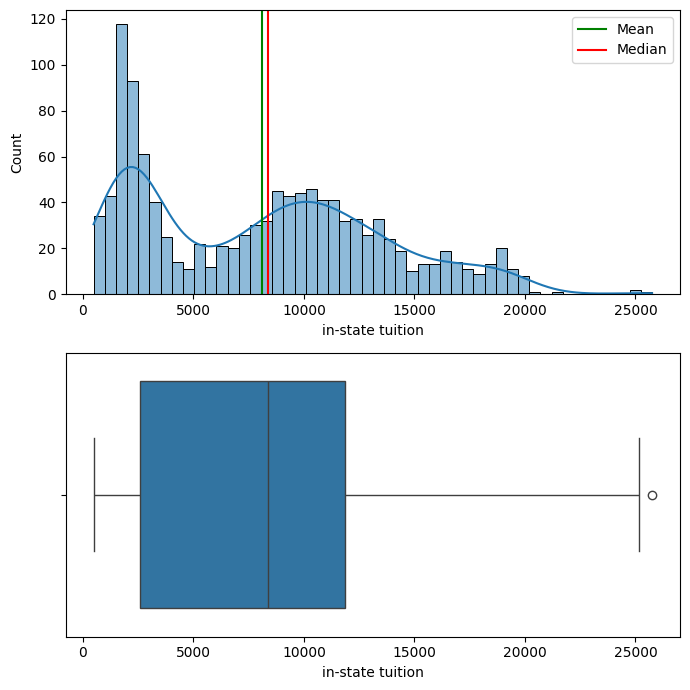

In [22]:
plot_hist_box(df, 'in-state tuition')
plt.savefig("./images/in-state-unclean.png")
# runs the plot_hist_box function for in-state tuition, and saves the file

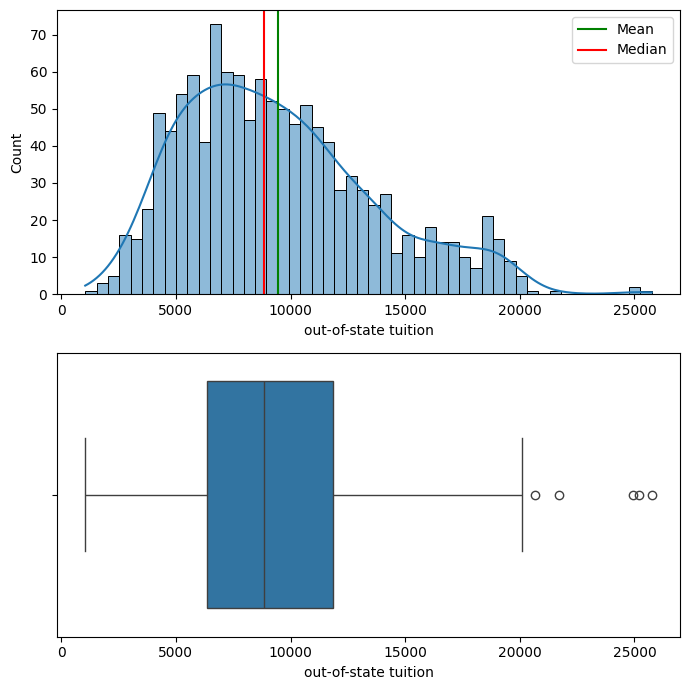

In [23]:
plot_hist_box(df, 'out-of-state tuition')
plt.savefig("./images/out-of-state-unclean.png")
# runs the plot_hist_box function for out-of-state tuition, and saves the file

> For the in-state tuition, we will impute with the median cost, as it is more bi-modal than normal distribution. However, for the out of state tuition, we will inpute with the mean, as this follows more of a normal distribution.
>
> Also, as states have different number of colleges, and cost can vary by state, we will group by state to impute. 

In [24]:

df['in-state tuition'] = df['in-state tuition'].fillna(df.groupby('State')['in-state tuition'].transform('mean'))
df['out-of-state tuition'] = df['out-of-state tuition'].fillna(df.groupby('State')['out-of-state tuition'].transform('median'))
# fills in the missing values for in-state and out-of-state tuition

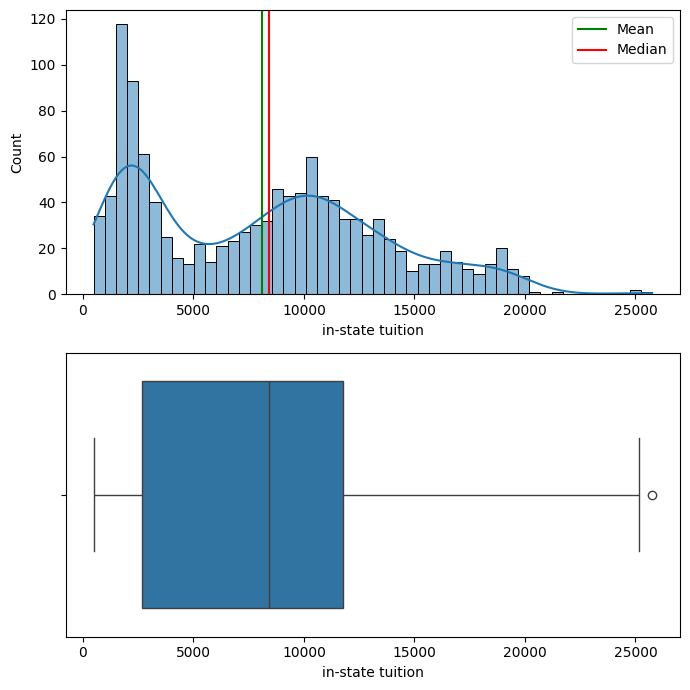

In [25]:
plot_hist_box(df, 'in-state tuition')
plt.savefig('./images/in-state-clean.png')
# runs the plot_hist_box function for in-state tuition, and saves the file after imputing values

> While only minor differeces are apparent, the overall mean in-state tuition seems to have risen. 

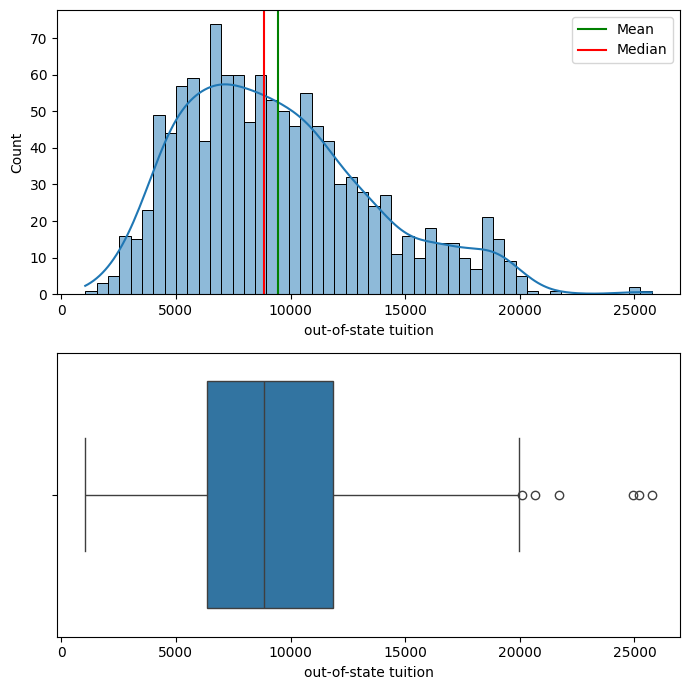

In [26]:
plot_hist_box(df, 'out-of-state tuition')
plt.savefig('./images/out-of-state-clean.png')
# runs the plot_hist_box function for in-state tuition, and saves the file after imputing values

> Again, only minor changes are apparent, but one noticible differece is that there were at 5 shown outliers prior, but now, after imputing, there are 6 shown outliers. This indicates that the q1 or q3 has changed, so the boundry has shrunk, causing more outliers. 

## Room and Board

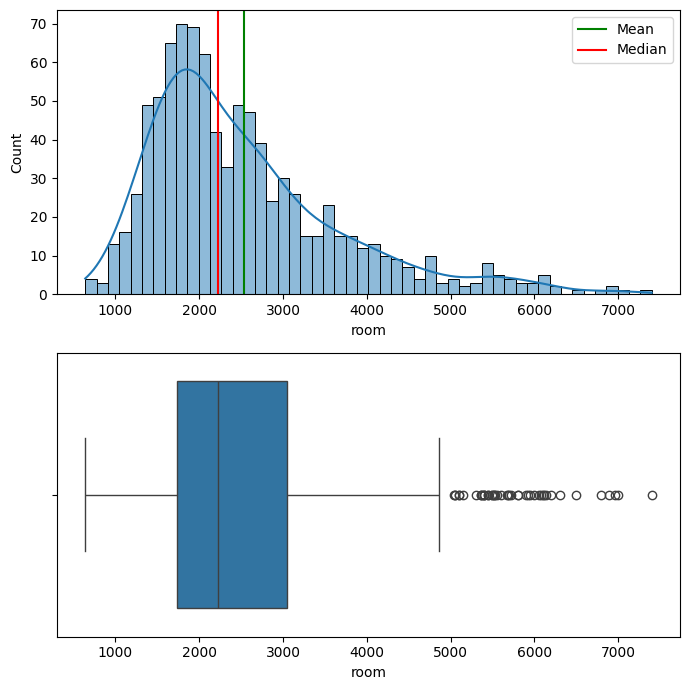

In [27]:
plot_hist_box(df, 'room')
plt.savefig('./images/room-unclean.png')
# runs the plot_hist_box function for room, and saves the file

> We can see this is very clearly right skewed, so we should use the median to impute values. 

In [28]:
df['room'] = df['room'].fillna(get_median_without_outliers(df['room']))
# imputes missing values for room with the median without considering outliers. 

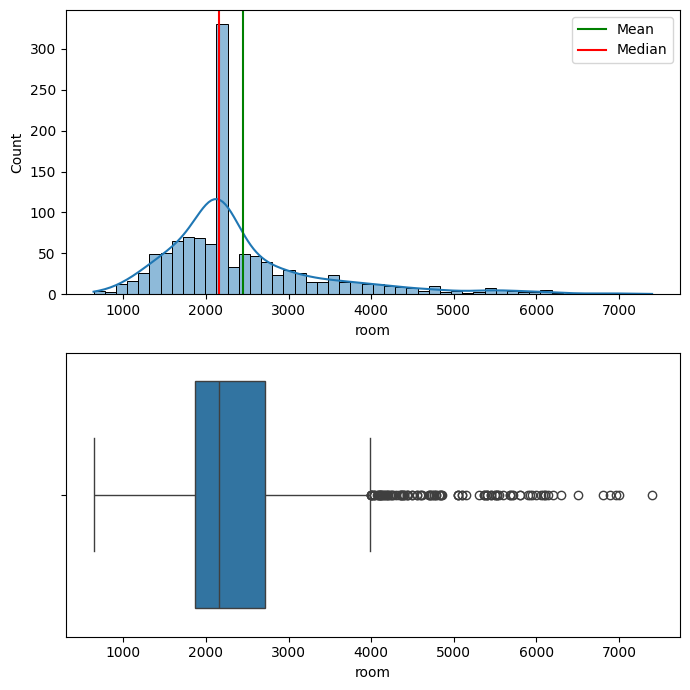

In [29]:
plot_hist_box(df, 'room')
plt.savefig('./images/room-clean.png')
# runs the plot_hist_box function for room, and saves the file after imputing the column

> We can see now that there is a spike around the median. As there were many missing values for `room`, and we imputed them with all the same value, this is to be expected. 

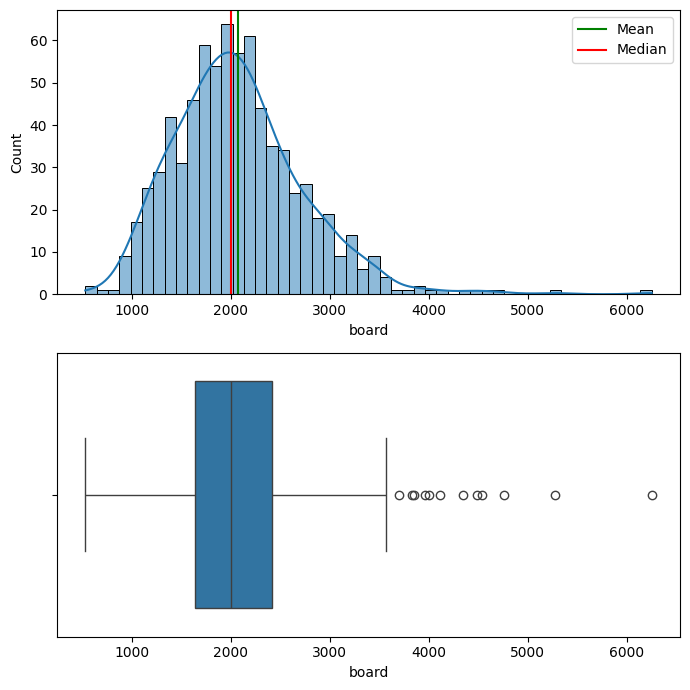

In [30]:
plot_hist_box(df, 'board')
plt.savefig('./images/board-unclean.png')
# runs the plot_hist_box function for board, and saves the file

> Here, we can see the price of board is pretty close to normally distributed, and probably would be if not for the outliers higher than 4000. So, for this one, we will impute with the mean.

In [31]:
df['board'] = df['board'].fillna(get_mean_without_outliers(df['board']))
# imputes the missing values with the mean without considering outliers. 

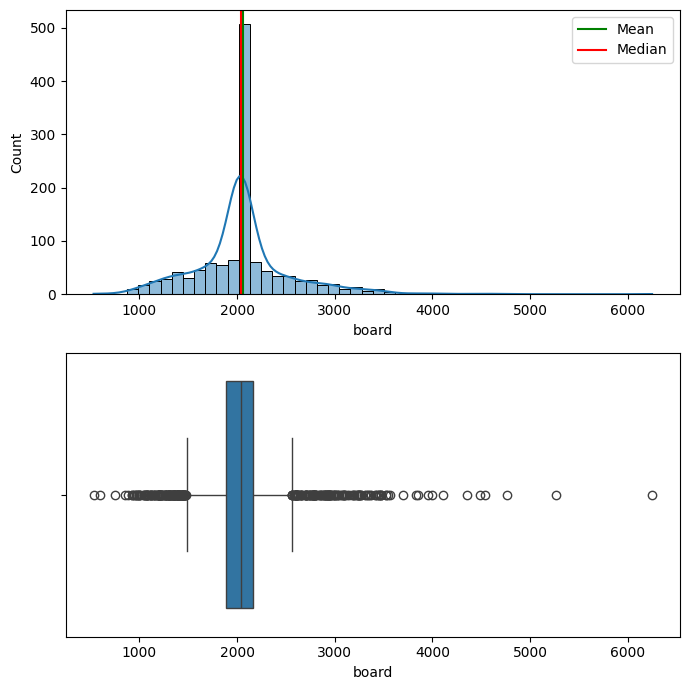

In [32]:
plot_hist_box(df, 'board')
plt.savefig('./images/board-clean.png')
# runs the plot_hist_box function for board, and saves the file after imputing the column

> The same as before with room, there is a spike around the mean (and median in this case) as we imputed the missing values with the same value, so this is expected. Due to all the missing values suddenly being filled in, the boundries of the outliers have changed dramatically, causing the number of outliers to skyrocket. 

## Other columns to fill in 

In [33]:
df['add. fees'] = df['add. fees'].fillna(get_median_without_outliers(df['add. fees']))
df['estim. personal $'] = df['estim. personal $'].fillna(get_mean_without_outliers(df['estim. personal $']))
# imputes the missing values with the median/mean without considering outliers. 

Per my previous analysis, I filled in both the additional fees and estimated personal cost. 

## Top 10% and 25%

> These columns should be filled with 0s, as stated previosuly.

In [34]:
df['new_student_top_10'] = df['new_student_top_10'].fillna(0)
df['new_student_top_25'] = df['new_student_top_25'].fillna(0)
# filles in missing value with 0, as NA means 0% are from the top 10%/25%

In [35]:
df = df.dropna()
# drop remaining missing values

## More Visuals of Trends

<Axes: >

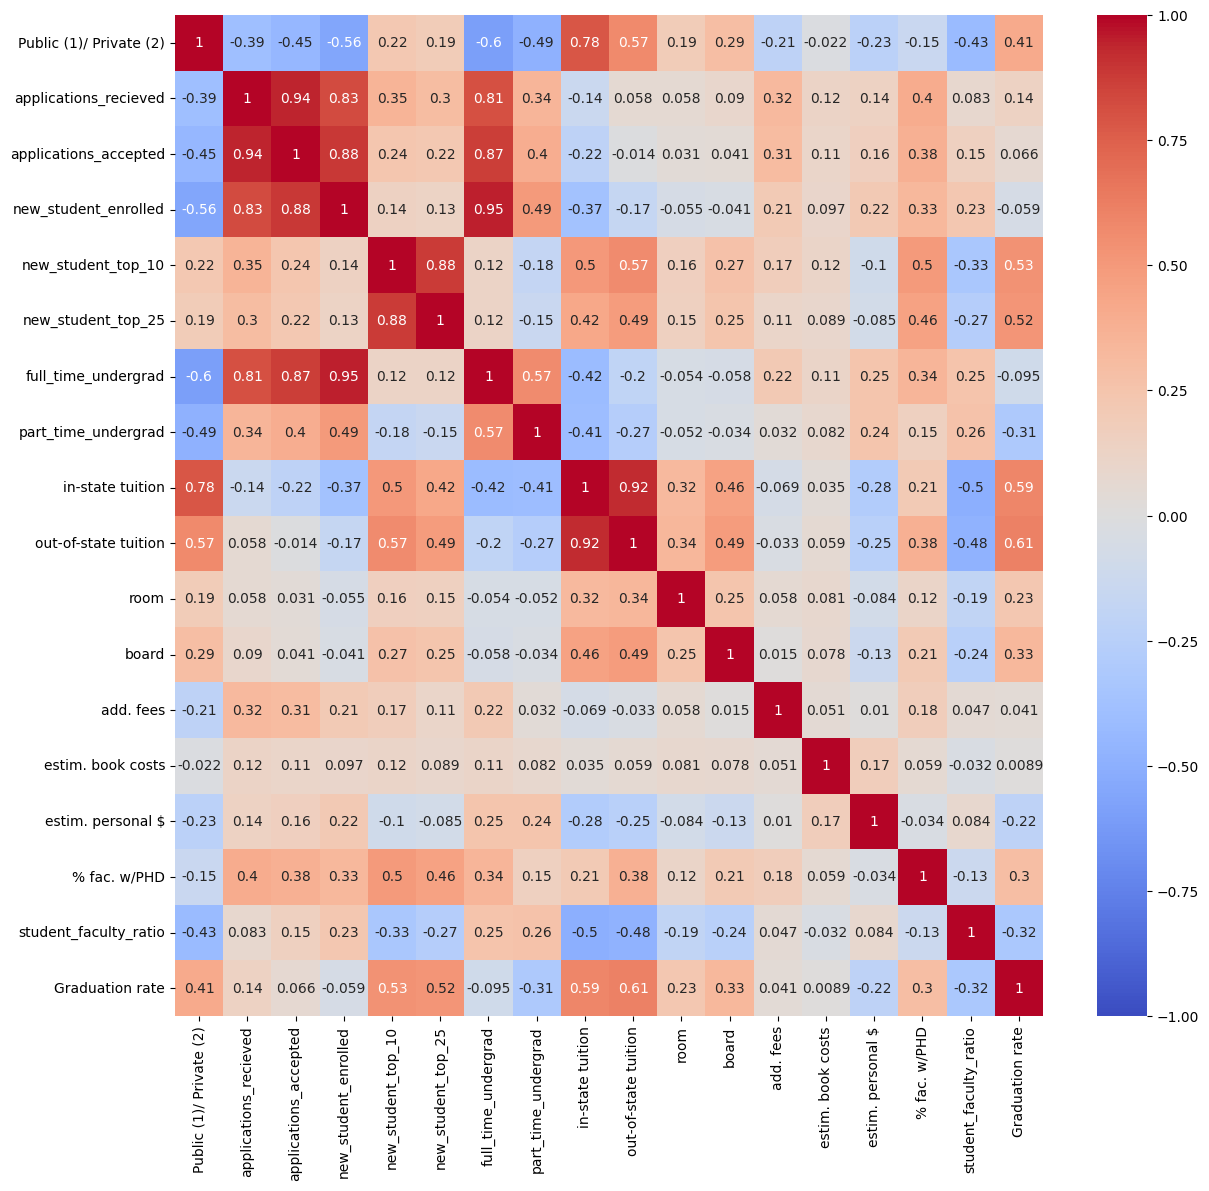

In [47]:
plt.figure(figsize=(14, 13))
sns.heatmap(df.corr(numeric_only=True),
           vmin=-1,
           vmax=1,
           cmap='coolwarm',
           annot=True)
# outputs a heatmap of the correlations for the numeric columns in the dataframe

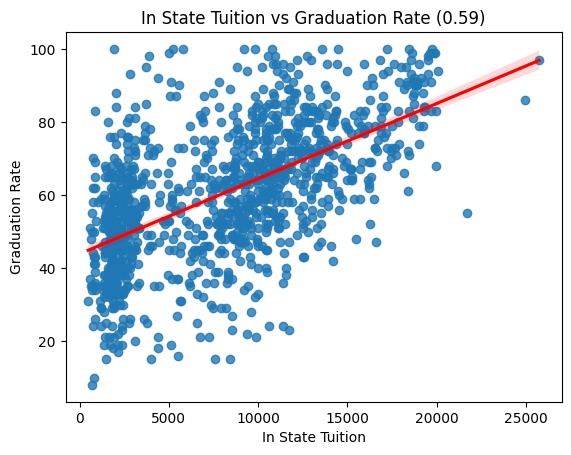

In [65]:
sns.regplot(data=df, x='in-state tuition', y='Graduation rate', line_kws={'color': 'red'})
plt.title("In State Tuition vs Graduation Rate (0.59)")
plt.xlabel("In State Tuition")
plt.ylabel("Graduation Rate");
plt.savefig("./images/in-state-tuition-grad-rate.png")
# creates a regression plot showing the relationship between in-state tuition and graduation rate. 

> We can see a moderate to strong relationship between `in-state tuition` and `Graduation rate`, showing that the cost of college definitely has an influence on graduation rates. 

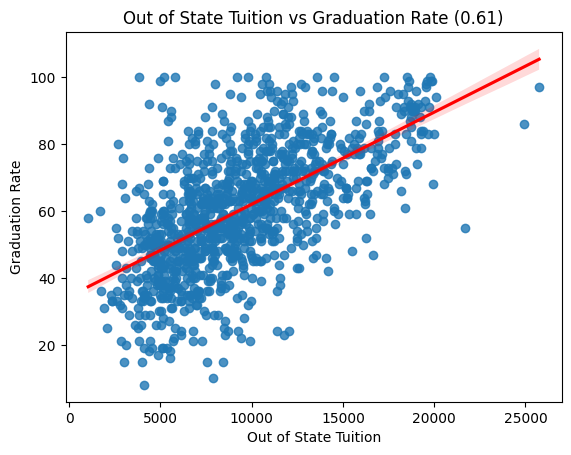

In [66]:
sns.regplot(data=df, x='out-of-state tuition', y='Graduation rate', line_kws={'color': 'red'})
plt.title("Out of State Tuition vs Graduation Rate (0.61)")
plt.xlabel("Out of State Tuition")
plt.ylabel("Graduation Rate");
plt.savefig("./images/out-of-state-tuition-grad-rate.png")
# creates a regression plot showing the relationship between out-of-state tuition and graduation rate. 

> We can see a moderate to strong relationship between `out-of-state tuition` and `Graduation rate`, showing that the cost of college definitely has an influence on graduation rates. 

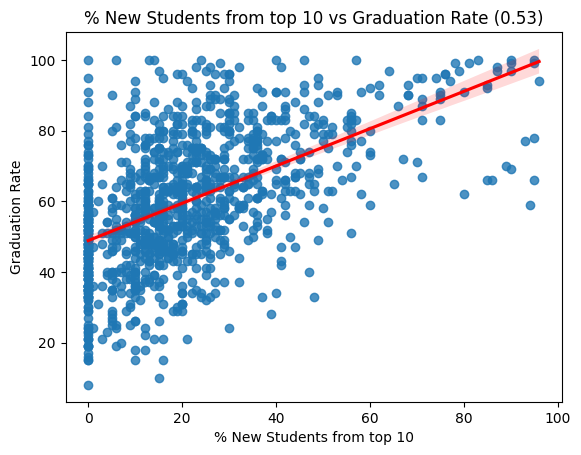

In [68]:
sns.regplot(data=df, x='new_student_top_10', y='Graduation rate', line_kws={'color': 'red'})
plt.title("% New Students from top 10 vs Graduation Rate (0.53)")
plt.xlabel("% New Students from top 10")
plt.ylabel("Graduation Rate");
plt.savefig("./images/top-10-grad-rate.png")
# creates a regression plot showing the relationship between % of new students from top 10% and graduation rate. 

> We can see a moderate to strong relationship between the % of new students from top 10% and `Graduation rate`, showing that the cost of college definitely has an influence on graduation rates. 

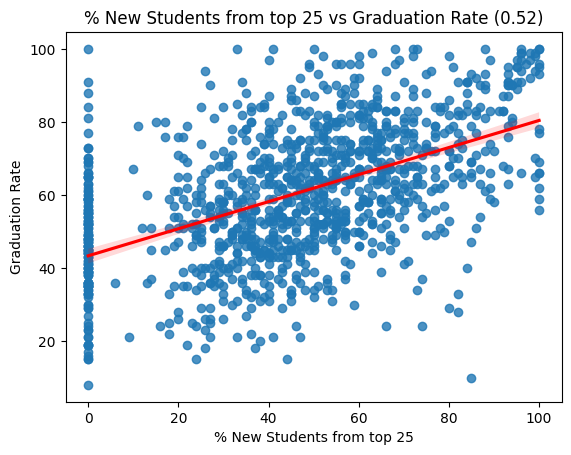

In [69]:
sns.regplot(data=df, x='new_student_top_25', y='Graduation rate', line_kws={'color': 'red'})
plt.title("% New Students from top 25 vs Graduation Rate (0.52)")
plt.xlabel("% New Students from top 25")
plt.ylabel("Graduation Rate");
plt.savefig("./images/top-25-grad-rate.png")
# creates a regression plot showing the relationship between % of new students from top 25% and graduation rate. 

> We can see a moderate to strong relationship between the % of new students from top 25% and `Graduation rate`, showing that the cost of college definitely has an influence on graduation rates. 

In [70]:
break 
# working on visuals before this

SyntaxError: 'break' outside loop (1250715827.py, line 1)

## Feature Selection

Here is where I will select the features I believe will contribute most to Graduation Rate

In [ ]:
df.columns

### Excluded Features

- College state and name: These are tied to geographic location rather than student characteristics, so they are not likely to influence graduation rates and can be safely ignored.

- Applications received and accepted: These metrics describe demand for the institution, not student outcomes, and therefore provide little insight into graduation rates.

### Included Features
- Cost of attendance (beyond tuition): Expenses such as room, board, books, and miscellaneous fees may significantly influence graduation rates. Higher total costs could require students to work additional hours, take fewer classes, or temporarily withdraw—factors that can negatively affect graduation outcomes.

- Tuition (in-state and out-of-state): Higher tuition may correlate with more rigorous academic programs or institutions with stronger academic expectations, which can impact graduation rates.

- Academic preparedness (Top 10% / Top 25% students): The percentage of incoming students ranked in the top 10% and 25% of their high school class indicates the academic strength of new enrollees. A stronger student body may be associated with higher graduation rates.

- Number of new students: Since the top 10%/25% metrics are calculated as percentages of new enrollees, the total number of new students provides important context and should be included.

- Student type (full-time vs. part-time): The number of full-time and part-time students reflects enrollment patterns but not necessarily graduation outcomes, so this may be less directly predictive. However, it may still offer insight into institutional structure.

- Student–faculty ratio: A lower ratio can indicate more personalized instruction and support, potentially contributing to better student performance and higher graduation rates.

- Faculty with PhDs: A higher percentage of faculty with doctoral degrees may correlate with stronger academic quality and more effective instruction, benefiting graduation outcomes.

- School type (Public vs. Private): Different institution types often have differing admission standards, student support structures, and academic expectations, all of which can influence graduation rates.

In [73]:
accepted_columns = ['in-state tuition', 
                    'out-of-state tuition', 
                    'new_student_top_10', 
                    'new_student_top_25', 
                    'new_student_enrolled', 
                    'room',
                    'board', 
                    '% fac. w/PHD', 
                    'student_faculty_ratio', 
                    'school_type', 
                    'full_time_undergrad', 
                    'part_time_undergrad',
                    'estim. book costs', 
                    'estim. personal $',
                    'Graduation rate']
# list of features to include for machine learning model.

In [74]:
new_df = df[accepted_columns]
# creates a new dataframe of only the selected columns 

In [76]:
new_df.isna().sum()
# makes sure that all the columns have no missing values

in-state tuition         0
out-of-state tuition     0
new_student_top_10       0
new_student_top_25       0
new_student_enrolled     0
room                     0
board                    0
% fac. w/PHD             0
student_faculty_ratio    0
school_type              0
full_time_undergrad      0
part_time_undergrad      0
estim. book costs        0
estim. personal $        0
Graduation rate          0
dtype: int64

In [77]:
new_df.shape

(1112, 15)

In [ ]:
new_df.to_csv('./data/cleaned_universities.csv', index=False)

In [ ]:
new_df.info()

## Basic Modeling

In [78]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

In [79]:
new_df['school_type'] = new_df['school_type'].astype("category")
new_df['school_type_codes'] = new_df['school_type'].cat.codes

In [80]:
X = new_df.drop(columns=['school_type', 'Graduation rate'])
y = new_df['Graduation rate']

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [82]:
lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [83]:
lr.score(X_test, y_test)

0.46802921903292116

In [84]:
lr.feature_names_in_

array(['in-state tuition', 'out-of-state tuition', 'new_student_top_10',
       'new_student_top_25', 'new_student_enrolled', 'room', 'board',
       '% fac. w/PHD', 'student_faculty_ratio', 'full_time_undergrad',
       'part_time_undergrad', 'estim. book costs', 'estim. personal $',
       'school_type_codes'], dtype=object)